# Proyecto Integrador-Avance 2

*   Jorge Mariles Estrada | A01335663
*   Aldo Daniel Nava Barrios | A0133315
*   Ricardo Sinuhé Acevedo Baleón | A01794227





In [2]:
!pip install rasterio



In [3]:
import numpy as np
import pandas as pd
import shapely
import geopandas as gpd
import glob
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

import zipfile
import rasterio
from rasterio.plot import show
import plotly.express as px


import requests, zipfile, io
import cudf


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Datos temperatura exploración

In [5]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Proyecto integrador eq 29/data/islasCalor/centigrados-20240919T003308Z-002.zip", 'r')
zip_ref.extractall("/tmp/centigrados_2")
zip_ref.close()

In [6]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Proyecto integrador eq 29/data/islasCalor/centigrados-20240919T003308Z-001.zip", 'r')
zip_ref.extractall("/tmp/centigrados_1")
zip_ref.close()

In [7]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Proyecto integrador eq 29/data/islasCalor/rural-20240919T003320Z-002.zip", 'r')
zip_ref.extractall("/tmp/rural_2")
zip_ref.close()

In [8]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Proyecto integrador eq 29/data/islasCalor/rural-20240919T003320Z-001.zip", 'r')
zip_ref.extractall("/tmp/rural_1")
zip_ref.close()

In [9]:
# cantidad de ciudades donde se tienen datos
lista=glob.glob("/tmp/rural_1/rural/*")+glob.glob("/tmp/rural_2/rural/*")


for x in lista:
  print(x)

print(len(lista))

/tmp/rural_1/rural/ht_island_rural_Valladolid.tif
/tmp/rural_1/rural/ht_island_rural_Tehuacán.tif
/tmp/rural_1/rural/ht_island_rural_Juchitán de Zaragoza.tif
/tmp/rural_1/rural/ht_island_rural_Coatzacoalcos.tif
/tmp/rural_1/rural/ht_island_rural_Querétaro.tif
/tmp/rural_1/rural/ht_island_rural_Orizaba.tif
/tmp/rural_1/rural/ht_island_rural_Piedras Negras.tif
/tmp/rural_1/rural/ht_island_rural_Nogales.tif
/tmp/rural_1/rural/ht_island_rural_Cancún.tif
/tmp/rural_1/rural/ht_island_rural_Guaymas.tif
/tmp/rural_1/rural/ht_island_rural_Matehuala.tif
/tmp/rural_1/rural/ht_island_rural_Uruapan.tif
/tmp/rural_1/rural/ht_island_rural_Tlaxcala-Apizaco.tif
/tmp/rural_1/rural/ht_island_rural_Tianguistenco.tif
/tmp/rural_1/rural/ht_island_rural_Tampico.tif
/tmp/rural_1/rural/ht_island_rural_Cuernavaca.tif
/tmp/rural_1/rural/ht_island_rural_Celaya.tif
/tmp/rural_1/rural/ht_island_rural_Tuxtla Gutiérrez.tif
/tmp/rural_1/rural/ht_island_rural_Ciudad Juárez.tif
/tmp/rural_1/rural/ht_island_rural_Ciudad 

# **Datos para la Ciudad de México**

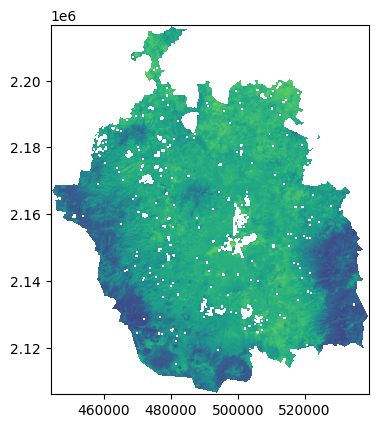

<Axes: >

In [10]:
fp = r'/tmp/centigrados_1/centigrados/ht_island_cent_Ciudad de México.tif'
img1 = rasterio.open(fp)
show(img1)

In [11]:
img1.shape

(3686, 3172)

In [12]:
img1.read()

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])

In [13]:
imarray1 = np.array(img1.read())
print(imarray1[~np.isnan(imarray1)])

[28.50219122 27.98766528 28.61742732 ... 17.62480866 17.84697996
 17.67390386]


In [14]:
img1.transform

Affine(30.0, 0.0, 444000.0,
       0.0, -30.0, 2216730.0)

In [15]:
img1.bounds


BoundingBox(left=444000.0, bottom=2106150.0, right=539160.0, top=2216730.0)

In [16]:
'''
zz = img1.read(1)
x = np.linspace(img1.bounds.left, img1.bounds.right, img1.shape[1])
y = np.linspace(img1.bounds.bottom, img1.bounds.top, img1.shape[0])
xx, yy = np.meshgrid(x, y)
df_cent_cdm = pd.DataFrame({
    'x': xx.flatten(),
    'y': yy.flatten(),
    'centi': zz.flatten(),
})
df_cent_cdm.head(1)
'''

"\nzz = img1.read(1)\nx = np.linspace(img1.bounds.left, img1.bounds.right, img1.shape[1])\ny = np.linspace(img1.bounds.bottom, img1.bounds.top, img1.shape[0])\nxx, yy = np.meshgrid(x, y)\ndf_cent_cdm = pd.DataFrame({\n    'x': xx.flatten(),\n    'y': yy.flatten(),\n    'centi': zz.flatten(),\n})\ndf_cent_cdm.head(1)\n"

In [17]:
#df_cent_cdm.loc[~(df_cent_cdm.centi.isna())]

In [18]:
#df_cent_cdm.describe()

#Ámbito rural Ciudad de México

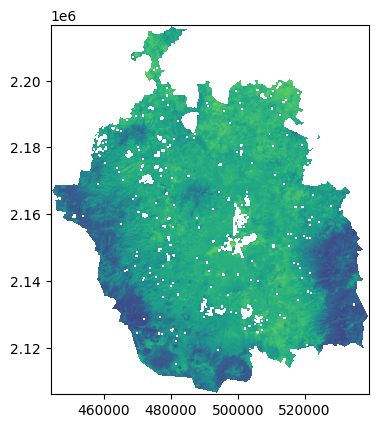

<Axes: >

In [19]:
fp = r'/tmp/rural_2/rural/ht_island_rural_Ciudad de México.tif'
img2 = rasterio.open(fp)
show(img2)

In [20]:
img2.shape

(3686, 3172)

In [21]:
3686*3172

11691992

In [22]:
img2.read()

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])

In [23]:
imarray2 = np.array(img2.read())
imarray2[~np.isnan(imarray2)]

array([ -3.62637144,  -4.14089738,  -3.51113534, ..., -14.503754  ,
       -14.2815827 , -14.4546588 ])

In [24]:
img2.crs

CRS.from_epsg(32614)

In [25]:
transform = img2.transform

# Get the raster dimensions
width = img2.width
height = img2.height

# Example: Convert the center pixel of the raster to geographic coordinates
# Center pixel coordinates (in pixel space)
pixel_x = width // 2
pixel_y = height // 2

# Convert to geographic coordinates
xlong, ylat = transform * (pixel_x, pixel_y)
print(xlong,ylat)

491580.0 2161440.0


Después de la transformación y una búsqueda en internet, podemos constatar que los números que se obtuvieron representan las coordanadas geográficas en un sistema de coordenadas proyectadas con el UTM (Universal Transverse Mercator). Ahora, convertiremos estas coordenadas a latitud y longitud que usamos comunmente.

In [26]:
from pyproj import Transformer
source_epsg = 32614  # UTM zone 14N
target_epsg = 4326   # WGS84

# Create a transformer object
transformer = Transformer.from_crs(source_epsg, target_epsg, always_xy=True)
utm_x = xlong   # Replace with your UTM x coordinate
utm_y = ylat  # Replace with your UTM y coordinate

# Perform the transformation
lon, lat = transformer.transform(utm_x, utm_y)
print(lon, lat )

-99.08026635512131 19.54776300485544


Después de estas líneas de código podemos convertir las coordenadas UTM que obtuvimos de las líneas de código pasadas a coordenadas de latitud y longitud.

In [79]:
import numpy as np
from pyproj import Transformer

# Transformando img 2
transform = img2.transform

# Obteniendo las dimensiones del raster
width = img2.width
height = img2.height

# Creando un objeto transformer
source_epsg = 32614  # UTM zone 14N
target_epsg = 4326   # WGS84
transformer = Transformer.from_crs(source_epsg, target_epsg, always_xy=True)

# Definición de listas para almacenar las coordenadas transformadas
lon_list = []
lat_list = []

# Iteración sobre cada píxel de la imagen
for pixel_y in range(height):
    for pixel_x in range(width):
        # Convertir a coordenadas geográficas
        xlong, ylat = transform * (pixel_x, pixel_y)

        # Transformar de UTM a latitud y longitud
        lon, lat = transformer.transform(xlong, ylat)

        # Almacenar las coordenadas transformadas
        lon_list.append(lon)
        lat_list.append(lat)

En estas líneas, podemos transformar todos los puntos de la imagen a coordenadas de latitud y longitud, con el fin de que nuestros datos estén preparados para integrar datos de otras fuentes en el mismo formato, como haremos más adelante con la DENUE.

In [78]:
import random

# Una vez que lon_list y lat_list ya están llenas con las coordenadas transformadas

# Seleccionamos un índice aleatorio
random_index = random.randint(0, len(lon_list) - 1)

# Obtenemos la longitud y latitud correspondiente
random_lon = lon_list[random_index]
random_lat = lat_list[random_index]

# Imprimimos la coordenada aleatoria
print(f"Coordenada aleatoria: Longitud = {random_lon}, Latitud = {random_lat}")

Coordenada aleatoria: Longitud = -99.50073826853644, Latitud = 19.480665503587783


Generamos un punto random para comprobar que la coordenada aleatoria está en la Ciudad de México

In [27]:
zz = img2.read(1)
x = np.linspace(img1.bounds.left, img1.bounds.right, img1.shape[1])
y = np.linspace(img1.bounds.bottom, img1.bounds.top, img1.shape[0])
xx, yy = np.meshgrid(x, y)
df_diff_cdm = cudf.DataFrame({
    'x': xx.flatten(),
    'y': yy.flatten(),
    'diff': zz.flatten(),
})
df_diff_cdm.head(5)

x          y  diff
0  444000.000000  2106150.0  <NA>
1  444030.009461  2106150.0  <NA>
2  444060.018921  2106150.0  <NA>
3  444090.028382  2106150.0  <NA>
4  444120.037843  2106150.0  <NA>

In [28]:
df_diff_cdm=df_diff_cdm.loc[~(df_diff_cdm['diff'].isna())]

In [29]:
df_diff_cdm.shape

(6713808, 3)

In [32]:
def transform_lat_log(x,y):
  source_epsg = 32614  # UTM zone 14N
  target_epsg = 4326   # WGS84

  transformer = Transformer.from_crs(source_epsg, target_epsg, always_xy=True)
  lon, lat = transformer.transform(x, y)
  return lon, lat

In [33]:
df_diff_cdm['lon'], df_diff_cdm['lat'] = df_diff_cdm.apply_rows(transform_lat_log,
                   incols=['x','y'],
                   outcols=dict(lon=np.float64, lat=np.float64),
                   kwargs=dict())

TypeError: got an unexpected keyword argument 'lon'

In [34]:
df_diff_cdm[['long','lat']] =df_diff_cdm[['x','y']].apply(transform_lat_log,axis=1  )

ValueError: user defined function compilation failed.

In [35]:
df_diff_cdm.loc[~(df_diff_cdm['diff'].isna())]

x             y       diff
4366      479831.296121  2.106180e+06  -3.626371
4367      479861.305582  2.106180e+06  -4.140897
7537      479801.286660  2.106210e+06  -3.511135
7538      479831.296121  2.106210e+06  -3.781647
7539      479861.305582  2.106210e+06  -4.340965
...                 ...           ...        ...
11687302  493635.648061  2.216700e+06 -15.444331
11687303  493665.657521  2.216700e+06 -14.940018
11687304  493695.666982  2.216700e+06 -14.503754
11687305  493725.676443  2.216700e+06 -14.281583
11690476  493695.666982  2.216730e+06 -14.454659

[6713808 rows x 3 columns]

In [36]:
df_diff_cdm.describe()

x             y          diff
count  6.713808e+06  6.713808e+06  6.713808e+06
mean   4.935329e+05  2.167708e+06 -2.293127e+00
std    2.149344e+04  2.400589e+04  6.274791e+00
min    4.440000e+05  2.106180e+06 -2.915101e+01
25%    4.762002e+05  2.149302e+06 -5.401419e+00
50%    4.930054e+05  2.168027e+06 -1.312320e-01
75%    5.108011e+05  2.187292e+06  2.025439e+00
max    5.391600e+05  2.216730e+06  2.027760e+01

In [37]:
df_diff_cdm

x             y       diff
4366      479831.296121  2.106180e+06  -3.626371
4367      479861.305582  2.106180e+06  -4.140897
7537      479801.286660  2.106210e+06  -3.511135
7538      479831.296121  2.106210e+06  -3.781647
7539      479861.305582  2.106210e+06  -4.340965
...                 ...           ...        ...
11687302  493635.648061  2.216700e+06 -15.444331
11687303  493665.657521  2.216700e+06 -14.940018
11687304  493695.666982  2.216700e+06 -14.503754
11687305  493725.676443  2.216700e+06 -14.281583
11690476  493695.666982  2.216730e+06 -14.454659

[6713808 rows x 3 columns]

In [1]:
fig = px.scatter_mapbox(df_diff_cdm.loc[~(df_diff_cdm['diff'].isna())],
                        lat="x",
                        lon="y",
                        color="diff",
                        zoom=12,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

NameError: name 'px' is not defined

# **Segunda fuente de datos: DENUE**

In [30]:
zip_file_url='https://www.inegi.org.mx/contenidos/masiva/denue/denue_09_csv.zip'
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("/tmp/denue_09")

In [31]:
denue_09=pd.read_csv("/tmp/denue_09/conjunto_de_datos/denue_inegi_09_.csv",encoding='latin-1')
denue_09.head(1)


<ipython-input-31-514353f2646e>:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  denue_09=pd.read_csv("/tmp/denue_09/conjunto_de_datos/denue_inegi_09_.csv",encoding='latin-1')


id                          clee  \
0  8441800  09014115111000012000000000U4   

                                           nom_estab  \
0  AGRO DESARROLLADORES NUTRICIONALES Y ESPECIALI...   

                                          raz_social  codigo_act  \
0  AGRO DESARROLLADORES NUTRICIONALES Y ESPECIALI...      115111   

                         nombre_act          per_ocu tipo_vial  \
0  Servicios de fumigación agrícola  6 a 10 personas   AVENIDA   

          nom_vial tipo_v_e_1  ...  \
0  INSURGENTES SUR   CIRCUITO  ...   

                                           localidad  ageb manzana  \
0  Benito Juárez                                 ...  0717      19   

       telefono                  correoelec  www tipoUniEco    latitud  \
0  5578221074.0  AGRO.DESARROLLOS@GMAIL.COM  NaN       Fijo  19.366556   

    longitud  fecha_alta  
0 -99.181132     2019-11  

[1 rows x 42 columns]

In [32]:
denue_09.columns

Index(['id', 'clee', 'nom_estab', 'raz_social', 'codigo_act', 'nombre_act',
       'per_ocu', 'tipo_vial', 'nom_vial', 'tipo_v_e_1', 'nom_v_e_1',
       'tipo_v_e_2', 'nom_v_e_2', 'tipo_v_e_3', 'nom_v_e_3', 'numero_ext',
       'letra_ext', 'edificio', 'edificio_e', 'numero_int', 'letra_int',
       'tipo_asent', 'nomb_asent', 'tipoCenCom', 'nom_CenCom', 'num_local',
       'cod_postal', 'cve_ent', 'entidad', 'cve_mun', 'municipio', 'cve_loc',
       'localidad', 'ageb', 'manzana', 'telefono', 'correoelec', 'www',
       'tipoUniEco', 'latitud', 'longitud', 'fecha_alta'],
      dtype='object')

In [33]:
#print(denue_09.codigo_act.unique())

In [34]:
denue_09.municipio.unique()

array(['Benito Juárez', 'Iztacalco', 'Tlalpan', 'Venustiano Carranza',
       'La Magdalena Contreras', 'Iztapalapa', 'Coyoacán', 'Cuauhtémoc',
       'Gustavo A. Madero', 'Azcapotzalco', 'Álvaro Obregón',
       'Xochimilco', 'Milpa Alta', 'Miguel Hidalgo', 'Tláhuac',
       'Cuajimalpa de Morelos'], dtype=object)

In [35]:
denue_09.tipo_asent.value_counts()

tipo_asent
COLONIA                  417509
PUEBLO                    25103
BARRIO                    16333
UNIDAD HABITACIONAL        4291
ZONA COMERCIAL             1648
CONJUNTO HABITACIONAL      1474
LOCALIDAD                  1391
MANZANA                    1213
AMPLIACION                 1151
CIUDAD                      989
EJIDO                       632
FRACCIONAMIENTO             422
CONDOMINIO                  408
AEROPUERTO                  276
NINGUNO                     269
ZONA INDUSTRIAL             249
PARAJE                      179
SECCION                     153
CIUDAD INDUSTRIAL           117
VILLA                       106
PUERTO                       97
UNIDAD                       91
ZONA FEDERAL                 76
HACIENDA                     74
RESIDENCIAL                  69
ZONA MILITAR                 31
PARQUE INDUSTRIAL            29
CANTON                       24
COTO                         19
RANCHO                       18
EXHACIENDA                   15
RINCONADA                    15
CORREDOR INDUSTRIAL          13
SUPERMANZANA                  6
SECTOR                        6
GRANJA                        4
ZONA NAVAL                    3
PROLONGACION                  3
RANCHERIA                     2
REGION                        2
PRIVADA                       1
CUARTEL                       1
Name: count, dtype: int64

In [36]:
denue_09.tipo_vial.value_counts()

tipo_vial
CALLE                321576
AVENIDA               83460
EJE VIAL              33001
CALZADA               11254
CERRADA                4973
CIRCUITO               4110
PERIFERICO             3146
PRIVADA                2898
PROLONGACION           1465
ANDADOR                1454
CARRETERA              1444
PEATONAL                985
CALLEJON                840
OTRO(ESPECIFIQUE)       575
BOULEVARD               562
AUTOPISTA               393
VIADUCTO                375
DIAGONAL                113
RETORNO                  96
CONTINUACION             67
PASAJE                   55
CORREDOR                 14
AMPLIACION               13
CIRCUNVALACION            2
Name: count, dtype: int64

In [37]:
denue_09.nombre_act.value_counts()

nombre_act
Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas                                                             38032
Salones y clínicas de belleza y peluquerías                                                                                           20408
Comercio al por menor de artículos de papelería                                                                                       13338
Comercio al por menor de frutas y verduras frescas                                                                                    12600
Restaurantes con servicio de preparación de tacos y tortas                                                                            10943
                                                                                                                                      ...  
Residencias del sector público con cuidados de enfermeras para enfermos convalecientes, en rehabilitación, incurables y terminales        1
Servicios relacionados con el aprovechamiento forestal                                                                                    1
Minería de hierro                                                                                                                         1
Minería de barita                                                                                                                         1
Minería de caolín                                                                                                                         1
Name: count, Length: 946, dtype: int64

In [38]:
fig = px.scatter_mapbox(denue_09.loc[denue_09.municipio=='Iztapalapa'],
                        lat="latitud",
                        lon="longitud",
                        color="tipo_asent",
                        zoom=12,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [39]:
import plotly.express as px
fig = px.scatter_mapbox(denue_09.loc[denue_09.municipio=='Iztapalapa'],
                        lat="latitud",
                        lon="longitud",
                        color="tipo_vial",
                        zoom=12,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [40]:
import plotly.express as px
fig = px.scatter_mapbox(denue_09.loc[denue_09.municipio=='Benito Juárez'],
                        lat="latitud",
                        lon="longitud",
                        color="tipo_vial",
                        zoom=12,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [41]:
import plotly.express as px
fig = px.scatter_mapbox(denue_09.loc[denue_09.municipio=='Tlalpan'],
                        lat="latitud",
                        lon="longitud",
                        color="tipo_asent",
                        zoom=12,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [42]:
zip_file_url='https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/marcogeo/889463807469/09_ciudaddemexico.zip'
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("/tmp/marco_09")

In [43]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt
import geopandas
#sf = shp.Reader("/tmp/marco_09/conjunto_de_datos/09e.shp",encoding='iso-8859-1')
avenidas = geopandas.read_file('/tmp/marco_09/conjunto_de_datos/09e.shp')


In [44]:
avenidas.shape

(175540, 12)

<Axes: >

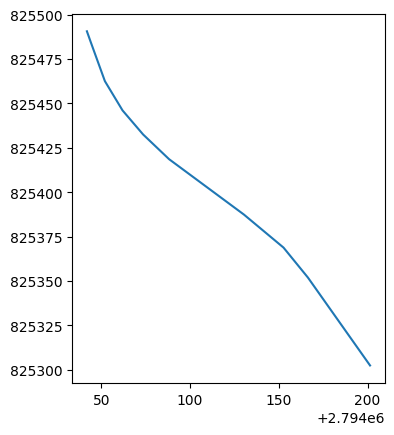

In [45]:
avenidas.head(1).plot()

<Axes: >

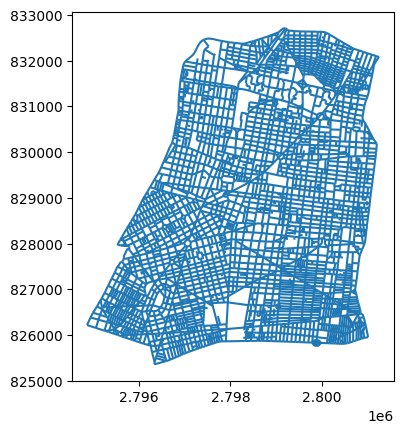

In [46]:
avenidas.loc[avenidas['CVE_MUN']=='015'].plot()

<Axes: >

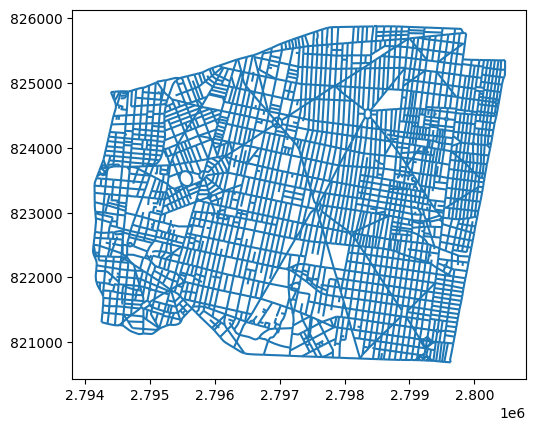

In [47]:
avenidas.loc[avenidas['CVE_MUN']=='014'].plot()

<Axes: >

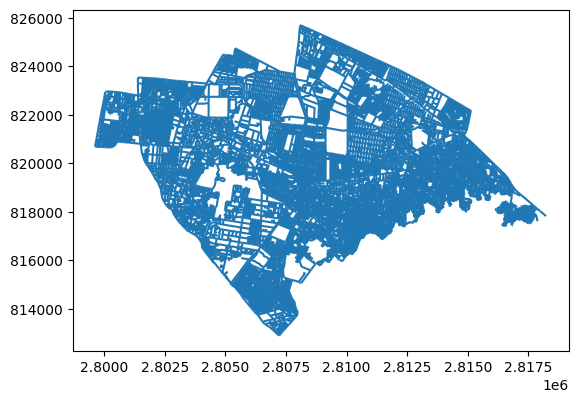

In [48]:
avenidas.loc[avenidas['CVE_MUN']=='007'].plot()

<Axes: >

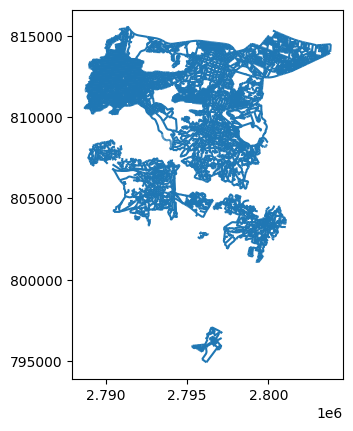

In [49]:
avenidas.loc[avenidas['CVE_MUN']=='012'].plot()

<Axes: >

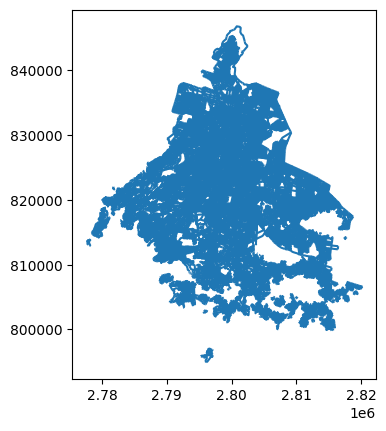

In [50]:
avenidas.plot()

In [51]:

localidad = geopandas.read_file('/tmp/marco_09/conjunto_de_datos/09l.shp')
localidad.head(1)

CVEGEO CVE_ENT CVE_MUN CVE_LOC          NOMGEO  AMBITO  \
0  090100001      09     010    0001  Álvaro Obregón  Urbana   

                                            geometry  
0  POLYGON ((2794395.922 824857.553, 2794434.245 ...

In [52]:
localidad.groupby(['CVE_MUN','NOMGEO']).count()

CVEGEO  CVE_ENT  CVE_LOC  AMBITO  geometry
CVE_MUN NOMGEO                                                           
002     Azcapotzalco                1        1        1       1         1
003     Coyoacán                    1        1        1       1         1
004     Cruz Blanca                 1        1        1       1         1
        Cuajimalpa de Morelos       1        1        1       1         1
        La Venta                    1        1        1       1         1
...                               ...      ...      ...     ...       ...
013     Zacazontlipac               1        1        1       1         1
014     Benito Juárez               1        1        1       1         1
015     Cuauhtémoc                  1        1        1       1         1
016     Miguel Hidalgo              1        1        1       1         1
017     Venustiano Carranza         1        1        1       1         1

[91 rows x 5 columns]

In [53]:
localidad['col']=localidad.AMBITO.apply(lambda x: 'r' if x=='Urbana' else 'g' )

In [54]:
localidad.AMBITO.unique()

array(['Urbana', 'Rural'], dtype=object)

<Axes: >

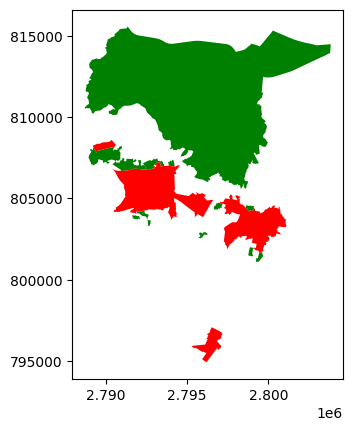

In [55]:
localidad.loc[localidad['CVE_MUN'].isin(['012'])].plot(color=localidad['col'])

<Axes: >

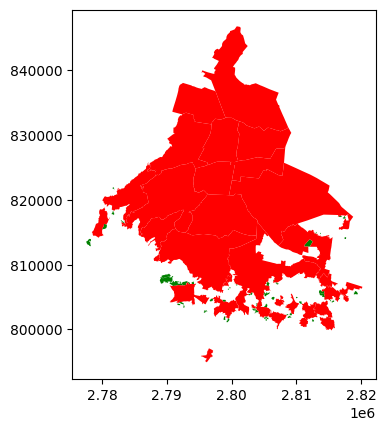

In [56]:
localidad.plot(color=localidad['col'])

In [57]:

sia = geopandas.read_file('/tmp/marco_09/conjunto_de_datos/09sia.shp')
sia.head(10)

CVEGEO CVE_ENT CVE_MUN CVE_LOC  CONDICION GEOGRAFICO  NOMSERV  \
0  090100001      09     010    0001  No Aplica   Camellón  Ninguno   
1  090100001      09     010    0001  No Aplica   Camellón  Ninguno   
2  090100001      09     010    0001  No Aplica   Camellón  Ninguno   
3  090100001      09     010    0001  No Aplica   Camellón  Ninguno   
4  090100001      09     010    0001  No Aplica   Camellón  Ninguno   
5  090100001      09     010    0001  No Aplica   Camellón  Ninguno   
6  090100001      09     010    0001  No Aplica   Camellón  Ninguno   
7  090100001      09     010    0001  No Aplica   Camellón  Ninguno   
8  090100001      09     010    0001  No Aplica   Camellón  Ninguno   
9  090100001      09     010    0001  No Aplica   Camellón  Ninguno   

                          TIPO  CVE_SERV  AMBITO  \
0                   Área Verde        44  Urbana   
1                   Área Verde        43  Urbana   
2                   Área Verde       760  Urbana   
3                   Área Verde       759  Urbana   
4                   Área Verde       677  Urbana   
5  Área Deportiva o Recreativa       678  Urbana   
6                   Área Verde       684  Urbana   
7                   Área Verde       663  Urbana   
8                   Área Verde       668  Urbana   
9                   Área Verde       669  Urbana   

                                            geometry  
0  POLYGON ((2793948.499 818932.88, 2793958.6 818...  
1  POLYGON ((2793322.347 823315.081, 2793336.471 ...  
2  POLYGON ((2793865.404 825284.98, 2793865.707 8...  
3  POLYGON ((2793358.765 825213.372, 2793362.791 ...  
4  POLYGON ((2788991.964 821267.297, 2788991.631 ...  
5  POLYGON ((2788783.786 820577.406, 2788799.629 ...  
6  POLYGON ((2789769.359 820006.742, 2789756.765 ...  
7  POLYGON ((2787115.131 821104.286, 2787112.122 ...  
8  POLYGON ((2787236.405 821203.93, 2787233.114 8...  
9  POLYGON ((2787414.314 821313.777, 2787411.761 ...

In [58]:
sia.groupby(['GEOGRAFICO','TIPO']).count()

CVEGEO  \
GEOGRAFICO                         TIPO                                    
Camellón                           Camellón                         1447   
                                   Glorieta                          163   
                                   Área Deportiva o Recreativa       455   
                                   Área Verde                       4454   
Centro de Asistencia Médica        Hospital                            1   
Cuerpo de Agua                     Bordo                               2   
                                   Estanque                            7   
                                   Lago                               17   
                                   Laguna                              1   
                                   Presa                               5   
Escuela                            Medio Superior                      1   
                                   Mixto                               1   
                                   Primaria                            1   
Estación de Transporte Terrestre   Estación de Metrobús              218   
                                   Estación de Tren Ligero            19   
Instalación Deportiva o Recreativa Cancha                             31   
                                   Jardín                             74   
                                   Parque                            162   
                                   Unidad Deportiva                    7   
                                   Áreas Verdes                       97   
Instalación Diversa                Monumento u Obelisco                1   
                                   Museo                               1   
                                   Planta de Tratamiento de Agua       1   
Plaza                              No Aplica                          20   
Templo                             No Aplica                           5   

                                                                  CVE_ENT  \
GEOGRAFICO                         TIPO                                     
Camellón                           Camellón                          1447   
                                   Glorieta                           163   
                                   Área Deportiva o Recreativa        455   
                                   Área Verde                        4454   
Centro de Asistencia Médica        Hospital                             1   
Cuerpo de Agua                     Bordo                                2   
                                   Estanque                             7   
                                   Lago                                17   
                                   Laguna                               1   
                                   Presa                                5   
Escuela                            Medio Superior                       1   
                                   Mixto                                1   
                                   Primaria                             1   
Estación de Transporte Terrestre   Estación de Metrobús               218   
                                   Estación de Tren Ligero             19   
Instalación Deportiva o Recreativa Cancha                              31   
                                   Jardín                              74   
                                   Parque                             162   
                                   Unidad Deportiva                     7   
                                   Áreas Verdes                        97   
Instalación Diversa                Monumento u Obelisco                 1   
                                   Museo                                1   
                                   Planta de Tratamiento de Agua        1   
Plaza                              No Aplica                           20   
Templo     

In [59]:
sia.TIPO.unique()

array(['Área Verde', 'Área Deportiva o Recreativa', 'Glorieta',
       'Camellón', 'Bordo', 'Presa', 'Parque', 'Jardín', 'Cancha',
       'Estación de Metrobús', 'Lago', 'Áreas Verdes',
       'Estación de Tren Ligero', 'Mixto', 'No Aplica', 'Primaria',
       'Planta de Tratamiento de Agua', 'Hospital', 'Unidad Deportiva',
       'Monumento u Obelisco', 'Medio Superior', 'Museo', 'Estanque',
       'Laguna'], dtype=object)

In [60]:
sia.GEOGRAFICO.unique()

array(['Camellón', 'Cuerpo de Agua', 'Instalación Deportiva o Recreativa',
       'Estación de Transporte Terrestre', 'Escuela', 'Templo', 'Plaza',
       'Instalación Diversa', 'Centro de Asistencia Médica'], dtype=object)

<Axes: >

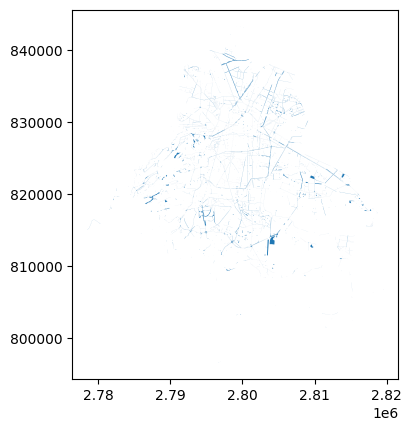

In [61]:
sia.plot()

<ipython-input-62-d7e4c4e906cd>:1: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.



<Axes: >

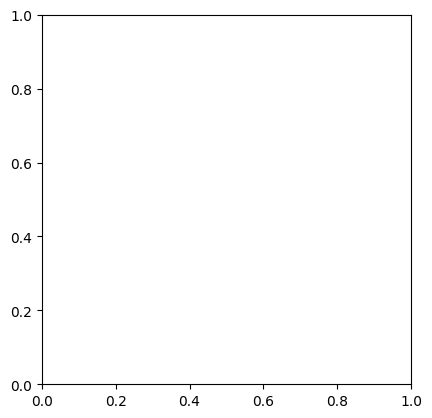

In [62]:
sia.loc[(sia.GEOGRAFICO.isin(['Plaza', 'Instalación Diversa']) )&(sia['CVE_MUN']=='014')].plot()

<Axes: >

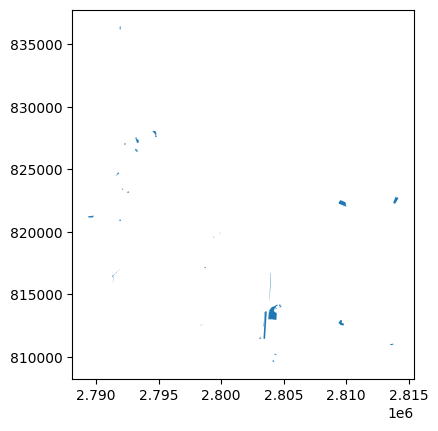

In [63]:
sia.loc[sia.GEOGRAFICO.isin(['Cuerpo de Agua'])].plot()

      CVEGEO CVE_ENT CVE_MUN CVE_LOC     CONDICION GEOGRAFICO  NOMSERV  \
0  090100001      09     010    0001  En Operación     Puente  Ninguno   

        TIPO  CVE_SERV  AMBITO  \
0  Vehicular       533  Urbana   

                                            geometry  
0  LINESTRING (2788140.618 823064.005, 2788139.20...  
['Puente' 'Corriente de Agua'
 'Restricción de Paso a Peatones y/o Automóviles' 'Túnel'
 'Paso a Desnivel' 'Lindero' 'Carretera' 'Camino' 'Canal' 'Vía Férrea']


<Axes: >

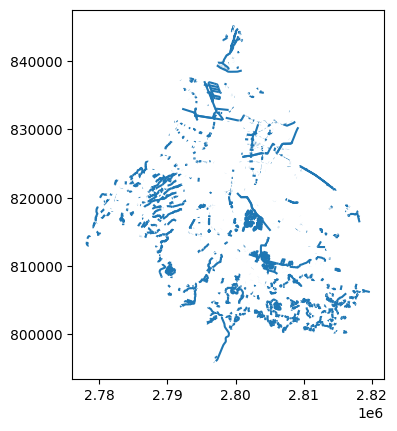

In [64]:
sil = geopandas.read_file('/tmp/marco_09/conjunto_de_datos/09sil.shp')
print(sil.head(1))
print(sil.GEOGRAFICO.unique())
sil.plot()

             CVEGEO CVE_ENT CVE_MUN CVE_LOC CVE_AGEB CVE_MZA     CONDICION  \
0  0901000012381001      09     010    0001     2381     001  En Operación   

  GEOGRAFICO  NOMSERV  TIPO  CVE_SERV  AMBITO                        geometry  
0       Pozo  Ninguno  Agua       109  Urbana  POINT (2785643.125 815803.737)  
['Pozo' 'Escuela' 'Mercado' 'Centro de Asistencia Médica' 'Templo'
 'Instalación Deportiva o Recreativa' 'Cementerio'
 'Estación de Transporte Terrestre' 'Subestación Eléctrica'
 'Centro Comercial' 'Instalación Gubernamental' 'Instalación de Servicios'
 'Plaza' 'Instalación Diversa' 'Tanque de Agua' 'Zona Arqueológica'
 'Instalación de Comunicación' 'Aeródromo Civil'
 'Restricción de Paso a Peatones y/o Automóviles']


<Axes: >

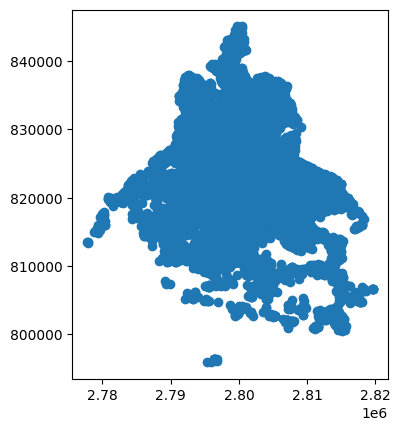

In [65]:
sip = geopandas.read_file('/tmp/marco_09/conjunto_de_datos/09sip.shp')
print(sip.head(1))
print(sip.GEOGRAFICO.unique())
sip.plot()

<Axes: >

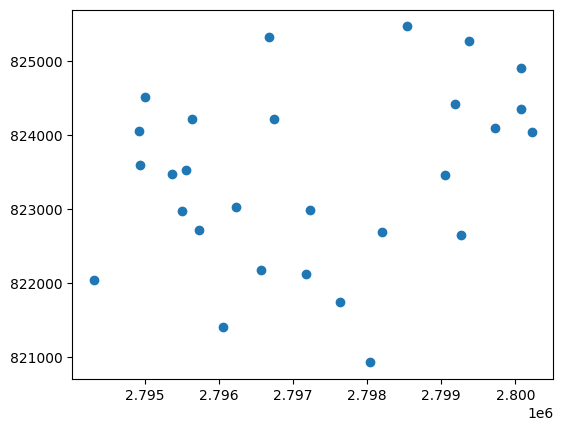

In [66]:
sip.loc[(sip.GEOGRAFICO.isin(['Instalación Deportiva o Recreativa']) )&(sip['CVE_MUN']=='014')].plot()

In [67]:

ar = geopandas.read_file('/tmp/marco_09/conjunto_de_datos/09ar.shp')
ar.head(10)

CVEGEO CVE_ENT CVE_MUN CVE_AGEB  \
0  090110471      09     011     0471   
1  090101326      09     010     1326   
2  090090539      09     009     0539   
3  090090524      09     009     0524   
4  090090115      09     009     0115   
5  090090100      09     009     0100   
6  090080368      09     008     0368   
7  090040157      09     004     0157   
8  090130902      09     013     0902   
9  090130635      09     013     0635   

                                            geometry  
0  POLYGON ((2814564.195 817691.07, 2815091.839 8...  
1  POLYGON ((2785827.093 816767.468, 2785837.887 ...  
2  POLYGON ((2803779.516 803274.976, 2803805.551 ...  
3  POLYGON ((2809143.593 805447.034, 2809153.171 ...  
4  POLYGON ((2799611.309 796078.492, 2799618.369 ...  
5  POLYGON ((2814309.24 806180.312, 2814247.107 8...  
6  POLYGON ((2786429.161 814261.727, 2786438.851 ...  
7  POLYGON ((2780064.504 819972.262, 2780059.902 ...  
8  POLYGON ((2803503.596 803205.306, 2803534.627 ...  
9  POLYGON ((2811036.863 808775.276, 2811062.244 ...

<Axes: >

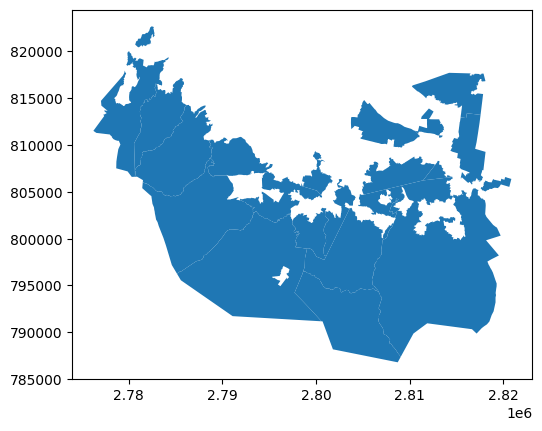

In [68]:
ar.plot()

In [69]:

cd = geopandas.read_file('/tmp/marco_09/conjunto_de_datos/09cd.shp')
cd.head(10)

CVEGEO CVE_ENT CVE_MUN CVE_LOC CVE_AGEB CVE_MZA  \
0  0901202171250800      09     012    0217     1250     800   
1  0901202181250800      09     012    0218     1250     800   
2  0901202761246800      09     012    0276     1246     800   
3  0901201051231800      09     012    0105     1231     800   
4  0901201241227800      09     012    0124     1227     800   
5  0901201281829800      09     012    0128     1829     800   
6  0901201311250800      09     012    0131     1250     800   
7  0901201441829800      09     012    0144     1829     800   
8  0901201611227800      09     012    0161     1227     800   
9  0901201681829800      09     012    0168     1829     800   

            TIPOMZA AMBITO                                           geometry  
0  Caserío Disperso  Rural  MULTIPOINT (2795543.382 801407.792, 2795902.50...  
1  Caserío Disperso  Rural  MULTIPOINT (2797098.172 802175.511, 2797224.05...  
2  Caserío Disperso  Rural  MULTIPOINT (2797160.884 803445.853, 2797264.71...  
3  Caserío Disperso  Rural  MULTIPOINT (2790208.424 803529.407, 2790496.24...  
4  Caserío Disperso  Rural  MULTIPOINT (2789490.951 808461.436, 2790007.82...  
5  Caserío Disperso  Rural  MULTIPOINT (2797931.644 800066.508, 2798305.02...  
6  Caserío Disperso  Rural                MULTIPOINT (2797453.184 797504.957)  
7  Caserío Disperso  Rural  MULTIPOINT (2800058.046 802620.358, 2800228.14...  
8  Caserío Disperso  Rural  MULTIPOINT (2792290.876 807238.19, 2792813.932...  
9  Caserío Disperso  Rural  MULTIPOINT (2799018.399 801344.484, 2799266.51...

<Axes: >

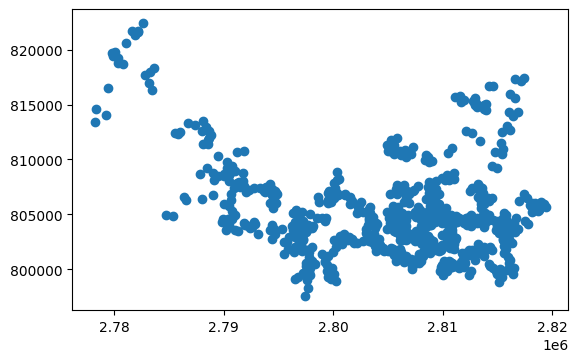

In [70]:
cd.plot()

<Axes: >

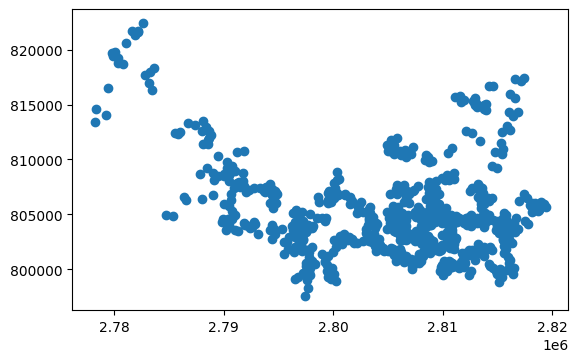

In [71]:
cd.plot()

In [72]:

zip_file_url='https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/tematicas/uso_suelo/702825568597_s.zip'
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("/tmp/09_uso")


In [73]:
z = zipfile.ZipFile('/tmp/09_uso/conjunto_de_datos/cdv_usv_1_250_000_serieV_cn.zip')
z.extractall("/tmp/09_uso/conjunto_de_datos")

In [74]:
a = geopandas.read_file('/tmp/09_uso/conjunto_de_datos/e1402_usv250s5a.shp')
a.head(10)

OBJECTID CVE_A       CODIGO        TIP_INFO      TIP_ECOV       ASPECTO  \
0        69   ADV  30000000030  COMPLEMENTARIA  NO APLICABLE  NO APLICABLE   
1      1766    AH  30000000032  COMPLEMENTARIA  NO APLICABLE  NO APLICABLE   
2      1768    AH  30000000032  COMPLEMENTARIA  NO APLICABLE  NO APLICABLE   
3      1773    AH  30000000032  COMPLEMENTARIA  NO APLICABLE  NO APLICABLE   
4      1774    AH  30000000032  COMPLEMENTARIA  NO APLICABLE  NO APLICABLE   
5      1775    AH  30000000032  COMPLEMENTARIA  NO APLICABLE  NO APLICABLE   
6      1785    AH  30000000032  COMPLEMENTARIA  NO APLICABLE  NO APLICABLE   
7      1786    AH  30000000032  COMPLEMENTARIA  NO APLICABLE  NO APLICABLE   
8      1791    AH  30000000032  COMPLEMENTARIA  NO APLICABLE  NO APLICABLE   
9      1793    AH  30000000032  COMPLEMENTARIA  NO APLICABLE  NO APLICABLE   

                       OTROS  \
0  DESPROVISTO DE VEGETACION   
1      ASENTAMIENTOS HUMANOS   
2      ASENTAMIENTOS HUMANOS   
3      ASENTAMIENTOS HUMANOS   
4      ASENTAMIENTOS HUMANOS   
5      ASENTAMIENTOS HUMANOS   
6      ASENTAMIENTOS HUMANOS   
7      ASENTAMIENTOS HUMANOS   
8      ASENTAMIENTOS HUMANOS   
9      ASENTAMIENTOS HUMANOS   

                                            geometry  
0  POLYGON ((481185.63 2207461.099, 481071.785 22...  
1  POLYGON ((571101.157 2100964.012, 570167.847 2...  
2  POLYGON ((586980.132 2102051.964, 586591.444 2...  
3  POLYGON ((587293.307 2102405.214, 586755.39 21...  
4  POLYGON ((579498.352 2102557.555, 579466.761 2...  
5  POLYGON ((574522.091 2100977.455, 574007.978 2...  
6  POLYGON ((601719.086 2105436.955, 601731.118 2...  
7  POLYGON ((600780.459 2105638.723, 600736.003 2...  
8  POLYGON ((599979.431 2106666.736, 599968.932 2...  
9  POLYGON ((596374.103 2106230.49, 596531.936 21...

# Conclusiones

En este notebook, se logró lo siguiente:

*   Transformación exitosa de los datos de temperatura: Se logró transformar el formato original de los datos de temperatura al formato estándar de latitud y longitud, asegurando la compatibilidad con otras fuentes de datos y facilitando su análisis.
*   Enriquecimiento del conjunto de datos: Se integraron variables relevantes del Directorio Estadístico Nacional de Unidades Económicas (DENUE) del INEGI, como tipos de asentamiento, uso de suelo, cuerpos de agua, construcciones, vialidades y tipo de localidad. Estas variables aportan información geográfica valiosa que puede mejorar la capacidad predictiva del modelo al considerar factores que influyen en la temperatura.
* Consolidación de la base de datos: Se ha logrado un alto grado de consolidación de la base de datos, integrando y transformando las variables necesarias para el modelado. Esto proporciona una base sólida para la siguiente fase de CRISP-ML, que es la de "Modelado".

Consideraciones para las siguientes fases:

* Naturaleza iterativa de CRISP-ML: A pesar del avance en la preparación de los datos, es importante recordar que CRISP-ML es un proceso iterativo. En fases posteriores, como la evaluación del modelo, se podría identificar la necesidad de volver a esta fase para realizar ajustes, como agregar nuevas variables, transformar las existentes o realizar un análisis más profundo de la calidad de los datos.
* Escalabilidad y rendimiento: A medida que el modelo se escale y se trabaje con conjuntos de datos más grandes, será crucial optimizar el proceso de preparación de datos para asegurar la eficiencia y el rendimiento.
* Documentación: Es fundamental documentar detalladamente las transformaciones y decisiones tomadas en esta fase. Esto facilitará la reproducibilidad del proceso, el mantenimiento del modelo y la colaboración entre los miembros del equipo.

Próximos pasos:

* Fase de Modelado: Con la base de datos preparada, se puede proceder a la selección, entrenamiento y evaluación de modelos de Machine Learning para predecir la temperatura.
* Evaluación continua: A lo largo del proceso, es importante evaluar el impacto de las variables seleccionadas y las transformaciones realizadas en el rendimiento del modelo.